In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import torch

In [4]:
from rllib_emecom.utils.experiment_utils import initialise_ray
initialise_ray()

2023-11-05 12:52:54,453	INFO worker.py:1640 -- Started a local Ray instance. View the dashboard at 172.28.54.195:8265 


In [5]:
from IPython.display import clear_output
from ray.rllib.algorithms.algorithm import Algorithm

(raylet) [2023-11-05 12:53:04,395 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2063134720; capacity: 269490393088. Object creation will fail if spilling is required.


In [6]:
runs_dir = 'ray_results/goal_comms_gridworld/goal_comms_gridworld'
run = 'PPOMACRL_goal_comms_gridworld_17771_00000_0_2023-11-04_13-28-50'
ckpt = 'checkpoint_000049'
algo = Algorithm.from_checkpoint(f'{runs_dir}/{run}/{ckpt}')
clear_output()
print('Loaded checkpoint.')

Loaded checkpoint.


(raylet) [2023-11-05 12:53:34,420 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2062442496; capacity: 269490393088. Object creation will fail if spilling is required.


In [10]:
def eval(algo, n_evals: int = 1):
    mean_reward = 0
    mean_episode_length = 0

    for _ in range(n_evals):
        eval_results = algo.evaluate()

        mean_reward += eval_results['evaluation']['sampler_results']['episode_reward_mean']
        mean_episode_length += eval_results['evaluation']['sampler_results']['episode_len_mean']

    mean_reward /= n_evals
    mean_episode_length /= n_evals

    print(f'Mean reward: {mean_reward}, Mean episode length: {mean_episode_length}')

    return eval_results, mean_reward, mean_episode_length

In [15]:
eval_results, *_ = eval(algo, n_evals=10)

(raylet) [2023-11-05 12:54:24,464 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2062258176; capacity: 269490393088. Object creation will fail if spilling is required.


Mean reward: -6.4079999999999995, Mean episode length: 5.9399999999999995


(raylet) [2023-11-05 12:54:34,472 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2062249984; capacity: 269490393088. Object creation will fail if spilling is required.


In [16]:
pass

(raylet) [2023-11-05 12:54:44,482 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2062233600; capacity: 269490393088. Object creation will fail if spilling is required.


In [9]:
from rllib_emecom.utils.video_utils import embed_mp4
media = eval_results['evaluation']['sampler_results']['episode_media']
video = None
for k in media:
    if k.startswith('env'):
        video, *_ = media[k]
        break
if video:
    embed_mp4(video._path)

(raylet) [2023-11-03 10:41:08,538 E 2278 2300] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-03_10-39-46_128509_1964 is over 95% full, available space: 4054130688; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-03 10:41:18,550 E 2278 2300] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-03_10-39-46_128509_1964 is over 95% full, available space: 4054130688; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-03 10:41:28,560 E 2278 2300] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-03_10-39-46_128509_1964 is over 95% full, available space: 4054089728; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-03 10:41:38,571 E 2278 2300] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-03_10-39-46_128509_1964 is over 95% full, available space: 4054061056; capacity: 269490393088. Object creation will fail if sp

In [17]:
from rllib_emecom.utils.comms_data_collection import CollectCommsDataCallback
from ray.rllib.evaluation.worker_set import WorkerSet

In [25]:
eval_config = algo.evaluation_config.copy(copy_frozen=False)
eval_config.callbacks_class = CollectCommsDataCallback

eval_worker_set = WorkerSet(
    env_creator=algo.env_creator,
    validate_env=None,
    default_policy_class=algo.get_default_policy_class(algo.config),
    config=eval_config,
    num_workers=0,
    logdir=algo.logdir,
)

worker = eval_worker_set.local_worker()
algo.evaluation_workers = eval_worker_set
collect_comms_data_cb = worker.callbacks
collect_comms_data_cb.data.clear()

2023-11-05 12:57:46,805	WARNING algorithm_config.py:2574 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.


Building MACRL module...
Comms spec: {'message_dim': 16, 'comm_channels': {'agent_0': ['agent_1', 'agent_2'], 'agent_1': ['agent_0', 'agent_2'], 'agent_2': ['agent_0', 'agent_1']}, 'channel_fn': 'gumbel_softmax', 'channel_fn_config': {'temperature': 2.0, 'temperature_annealing': False, 'annealing_start_iter': 0, 'n_anneal_iterations': 500, 'final_temperature': 0.5, 'channel_noise': 0.25, 'channel_activation': 'tanh'}, 'n_agents': 3}
Communication channel function: <rllib_emecom.macrl.comms.gumbel_softmax.GumbelSoftmaxCommunicationChannel object at 0x7f254e4cfcd0>


(raylet) [2023-11-05 12:57:54,686 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2061844480; capacity: 269490393088. Object creation will fail if spilling is required.


In [19]:
macrl_module = worker.get_policy('default_policy').model
# channel_fn = macrl_module
# channel_fn.temperature
macrl_module

PPOTorchMACRLModule(
  (critic_encoder): TorchMLPEncoder(
    (net): TorchMLP(
      (mlp): Sequential(
        (0): Linear(in_features=129, out_features=256, bias=True)
        (1): Tanh()
        (2): Linear(in_features=256, out_features=256, bias=True)
        (3): Tanh()
      )
    )
  )
  (vf_head): TorchMLPHead(
    (net): TorchMLP(
      (mlp): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
      )
    )
  )
  (agents): ModuleDict(
    (agent_0): MACRLAgent(
      (inputs_encoder): TorchMLPEncoder(
        (net): TorchMLP(
          (mlp): Sequential(
            (0): Linear(in_features=43, out_features=256, bias=True)
            (1): Tanh()
            (2): Linear(in_features=256, out_features=256, bias=True)
            (3): Tanh()
          )
        )
      )
      (msgs_fn): Sequential(
        (0): Linear(in_features=256, out_features=48, bias=True)
      )
      (action_head): MACRLActionHead(
        (aggregate_msgs_and_obs): Sequential(
  

(raylet) [2023-11-05 12:54:54,494 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2062188544; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 12:55:04,507 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2062184448; capacity: 269490393088. Object creation will fail if spilling is required.


In [20]:
macrl_module.comm_channel_fn.disable()
eval(algo, n_evals=10)
macrl_module.comm_channel_fn.enable()
collect_comms_data_cb.data.clear()

(raylet) [2023-11-05 12:55:14,517 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2062172160; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 12:55:24,525 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2062163968; capacity: 269490393088. Object creation will fail if spilling is required.


Mean reward: -27.351999999999997, Mean episode length: 10.943999999999999


(raylet) [2023-11-05 12:55:34,533 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2062163968; capacity: 269490393088. Object creation will fail if spilling is required.


In [26]:
macrl_module.comm_channel_fn.enable()
macrl_module.comm_channel_fn.set_force_eval(True)
_ = eval(algo, n_evals=10)

(raylet) [2023-11-05 12:58:04,694 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2061836288; capacity: 269490393088. Object creation will fail if spilling is required.


Mean reward: -6.679999999999998, Mean episode length: 6.048


In [27]:
len(collect_comms_data_cb.data)

1512

In [28]:
macrl_module.comms_spec

{'message_dim': 16,
 'comm_channels': {'agent_0': ['agent_1', 'agent_2'],
  'agent_1': ['agent_0', 'agent_2'],
  'agent_2': ['agent_0', 'agent_1']},
 'channel_fn': 'gumbel_softmax',
 'channel_fn_config': {'temperature': 2.0,
  'temperature_annealing': False,
  'annealing_start_iter': 0,
  'n_anneal_iterations': 500,
  'final_temperature': 0.5,
  'channel_noise': 0.25,
  'channel_activation': 'tanh'},
 'n_agents': 3}

In [29]:
collect_comms_data_cb.data[0]

{'comms': {'agent_0': {'agent_1': array([3.59613520e-11, 3.47444740e-08, 1.00604975e-14, 9.99999881e-01,
          3.74165183e-14, 2.51092125e-09, 8.31131053e-10, 3.39675621e-10,
          4.44113607e-10, 6.75105388e-11, 1.10030440e-11, 3.39653583e-10,
          4.21565421e-11, 3.09407544e-09, 5.49660595e-10, 1.09407665e-07],
         dtype=float32),
   'agent_2': array([4.7431612e-07, 9.2481862e-09, 1.9939579e-03, 5.8045957e-11,
          3.4040304e-06, 4.5365130e-07, 6.6852368e-07, 1.0951874e-07,
          1.9041589e-07, 3.9709194e-06, 3.2620324e-07, 1.0478348e-08,
          6.0891580e-06, 8.4967724e-08, 9.9799025e-01, 6.3435346e-09],
         dtype=float32)},
  'agent_1': {'agent_0': array([2.7285079e-05, 4.8326359e-07, 1.9414429e-05, 6.3236057e-06,
          1.8958302e-06, 2.6439491e-04, 6.5193410e-07, 6.6883678e-07,
          2.8150032e-06, 1.6738861e-06, 1.6872360e-05, 9.9769092e-01,
          5.9057943e-08, 4.2540097e-04, 1.1826463e-03, 3.5861458e-04],
         dtype=float32),
 

(raylet) [2023-11-05 12:58:14,705 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2061791232; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 12:58:24,717 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2061778944; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 12:58:34,726 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2061770752; capacity: 269490393088. Object creation will fail if spilling is required.


In [30]:
df = collect_comms_data_cb.get_dataframe()
df['goal_id'] = df['goal_vec'].apply(lambda x: np.argmax(x))
df.head()

,receiver,sender,goal_x,goal_y,pos_x,pos_y,world_w,world_h,receiver_action,msg,...,msg_9,msg_10,msg_11,msg_12,msg_13,msg_14,msg_15,goal_grid_idx,pos_grid_idx,goal_id
0,agent_0,agent_2,0,4,2,4,5,5,1,14,...,3.970919e-06,3.262032e-07,1.047835e-08,6.089158e-06,8.496772e-08,9.979903e-01,6.343535e-09,20,22,0
1,agent_1,agent_0,0,2,0,2,5,5,3,11,...,1.673886e-06,1.687236e-05,9.976909e-01,5.905794e-08,4.254010e-04,1.182646e-03,3.586146e-04,10,10,1
2,agent_2,agent_1,4,4,1,1,5,5,1,9,...,9.999708e-01,6.732524e-11,3.448662e-10,5.782564e-10,7.507350e-11,2.770565e-10,2.923401e-05,24,6,2
3,agent_0,agent_2,0,4,1,4,5,5,3,14,...,6.905973e-05,1.660644e-06,1.396546e-07,1.333429e-04,3.526454e-06,9.951546e-01,3.860085e-07,20,21,0
4,agent_1,agent_0,0,2,1,2,5,5,1,5,...,8.464187e-10,3.206404e-07,4.873031e-06,9.645123e-12,1.307496e-06,9.954303e-06,1.119987e-05,10,11,1


In [31]:
df[df['goal_vec'].apply(lambda x: np.sum(x) > 1)]

,receiver,sender,goal_x,goal_y,pos_x,pos_y,world_w,world_h,receiver_action,msg,...,msg_9,msg_10,msg_11,msg_12,msg_13,msg_14,msg_15,goal_grid_idx,pos_grid_idx,goal_id
82,agent_1,agent_0,2,4,2,2,5,5,1,5,...,4.082321e-15,2.292515e-10,1.168913e-16,1.929917e-18,3.300278e-10,1.170963e-09,2.546947e-10,22,12,0
83,agent_2,agent_1,2,4,2,1,5,5,3,2,...,2.788305e-03,3.285343e-10,2.397655e-10,1.017341e-09,4.297292e-11,1.639726e-12,1.405246e-10,22,7,0
85,agent_1,agent_0,2,4,2,3,5,5,1,5,...,2.598842e-13,3.742004e-09,1.176918e-14,8.748780e-16,1.059827e-08,6.515496e-08,5.794635e-09,22,17,0
86,agent_2,agent_1,2,4,2,2,5,5,1,9,...,9.968695e-01,1.307009e-09,3.195819e-09,2.469538e-09,2.490990e-10,1.766150e-11,1.342274e-07,22,12,0
88,agent_1,agent_0,2,4,2,4,5,5,1,5,...,2.541090e-10,2.613379e-07,6.117733e-11,4.556844e-11,7.487282e-07,5.463381e-07,8.997488e-07,22,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,agent_1,agent_0,4,1,4,1,5,5,4,7,...,5.090999e-07,3.085478e-05,1.242626e-10,1.292479e-03,6.638708e-08,9.948206e-05,1.527105e-04,9,9,1
3732,agent_0,agent_2,4,1,4,1,5,5,2,1,...,2.203457e-08,5.056256e-08,5.216758e-12,5.339874e-10,1.126036e-08,2.051318e-12,2.325586e-06,9,9,1
3733,agent_1,agent_0,4,1,4,1,5,5,4,7,...,6.141196e-06,4.045412e-04,3.370131e-09,2.669192e-03,1.277957e-06,1.016309e-03,1.767701e-03,9,9,1
3735,agent_0,agent_2,4,1,4,0,5,5,2,1,...,4.758019e-06,1.715629e-06,4.579503e-09,2.527233e-07,1.625766e-06,3.118329e-06,5.121772e-05,9,4,1


(raylet) [2023-11-05 12:58:44,739 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2061766656; capacity: 269490393088. Object creation will fail if spilling is required.


In [32]:
agent_df = df[df['sender'] == 'agent_0']
agent_df

,receiver,sender,goal_x,goal_y,pos_x,pos_y,world_w,world_h,receiver_action,msg,...,msg_9,msg_10,msg_11,msg_12,msg_13,msg_14,msg_15,goal_grid_idx,pos_grid_idx,goal_id
1,agent_1,agent_0,0,2,0,2,5,5,3,11,...,1.673886e-06,1.687236e-05,9.976909e-01,5.905794e-08,4.254010e-04,0.001183,0.000359,10,10,1
4,agent_1,agent_0,0,2,1,2,5,5,1,5,...,8.464187e-10,3.206404e-07,4.873031e-06,9.645123e-12,1.307496e-06,0.000010,0.000011,10,11,1
7,agent_1,agent_0,0,2,0,2,5,5,3,11,...,1.157339e-05,6.361483e-04,7.364694e-01,2.848813e-06,9.145308e-04,0.072237,0.176618,10,10,1
10,agent_1,agent_0,0,2,1,2,5,5,4,5,...,2.233199e-10,9.201534e-07,7.836433e-07,4.677404e-12,5.147249e-07,0.000007,0.000002,10,11,1
13,agent_1,agent_0,0,2,0,2,5,5,3,11,...,2.443531e-04,1.927644e-04,9.860591e-01,3.379412e-06,4.703170e-04,0.004923,0.003316,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4522,agent_1,agent_0,2,4,2,4,5,5,3,11,...,5.062519e-06,1.664618e-04,9.752190e-01,1.814495e-07,7.305227e-04,0.003481,0.003816,22,22,2
4525,agent_1,agent_0,3,3,3,3,5,5,1,5,...,4.125881e-09,2.150095e-05,1.593042e-07,2.295530e-10,8.725598e-07,0.000323,0.000114,18,18,1
4528,agent_1,agent_0,3,3,2,3,5,5,3,14,...,2.082526e-04,2.462469e-02,2.037186e-01,1.307421e-04,1.234677e-03,0.328287,0.327290,18,17,1
4531,agent_1,agent_0,3,3,3,3,5,5,4,7,...,2.676553e-07,1.004641e-05,1.582494e-10,1.683991e-04,4.255367e-08,0.000009,0.000013,18,18,1


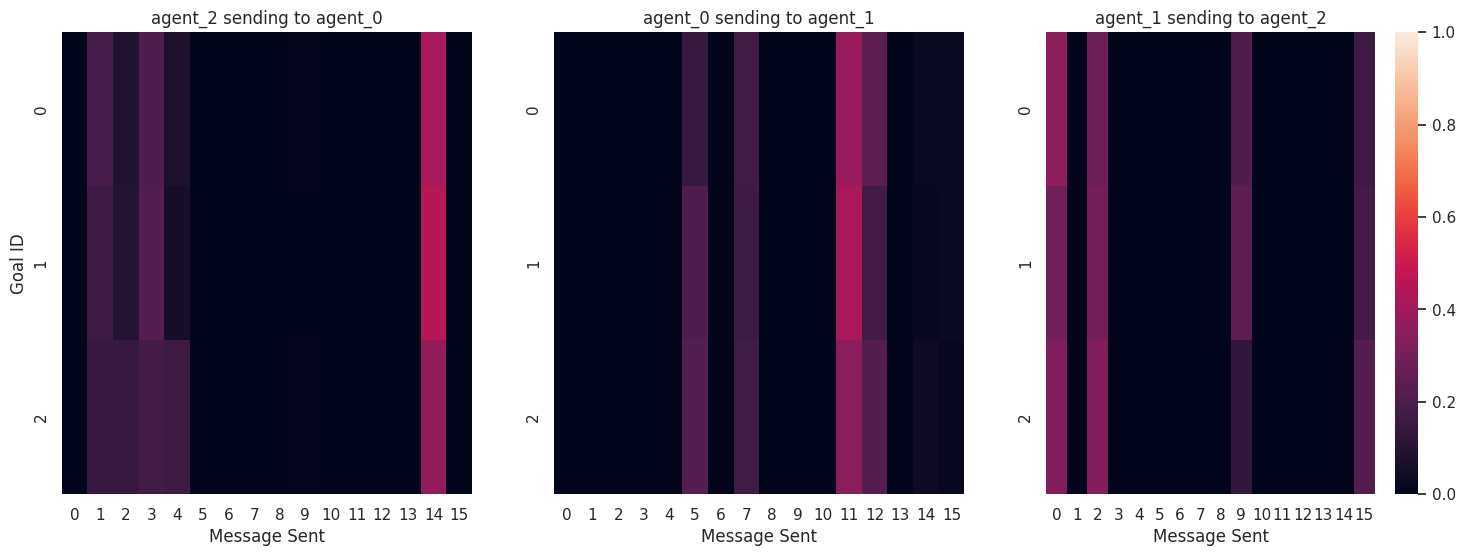

(raylet) [2023-11-05 12:58:54,748 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2061721600; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 12:59:04,761 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2061647872; capacity: 269490393088. Object creation will fail if spilling is required.


In [33]:
n_msgs = macrl_module.message_dim
n_goals = macrl_module.n_agents

agents = df['sender'].unique()
_, axs = plt.subplots(1, len(agents), figsize=(6 * len(agents), 6))
for i, agent in enumerate(agents):
    agent_df = df[df['sender'] == agent]
    recvs = agent_df['receiver'].unique()
    assert recvs.size == 1
    recv = recvs[0]

    agent_df = agent_df.groupby('goal_id')['msg'].value_counts(normalize=True).unstack()
    agent_df = agent_df.fillna(0)
    counts = np.zeros((n_goals, n_msgs))
    for msg in agent_df.columns:
        for action in agent_df.index:
            counts[action, msg] = agent_df.loc[action, msg]

    sns.heatmap(counts, ax=axs[i], vmin=0, vmax=1, cbar=i == len(agents) - 1)
    axs[i].set_title(f'{agent} sending to {recv}')
    if i > 0:
        axs[i].set_ylabel('')
    else:
        axs[i].set_ylabel('Goal ID')
    axs[i].set_xlabel('Message Sent')

<AxesSubplot: >

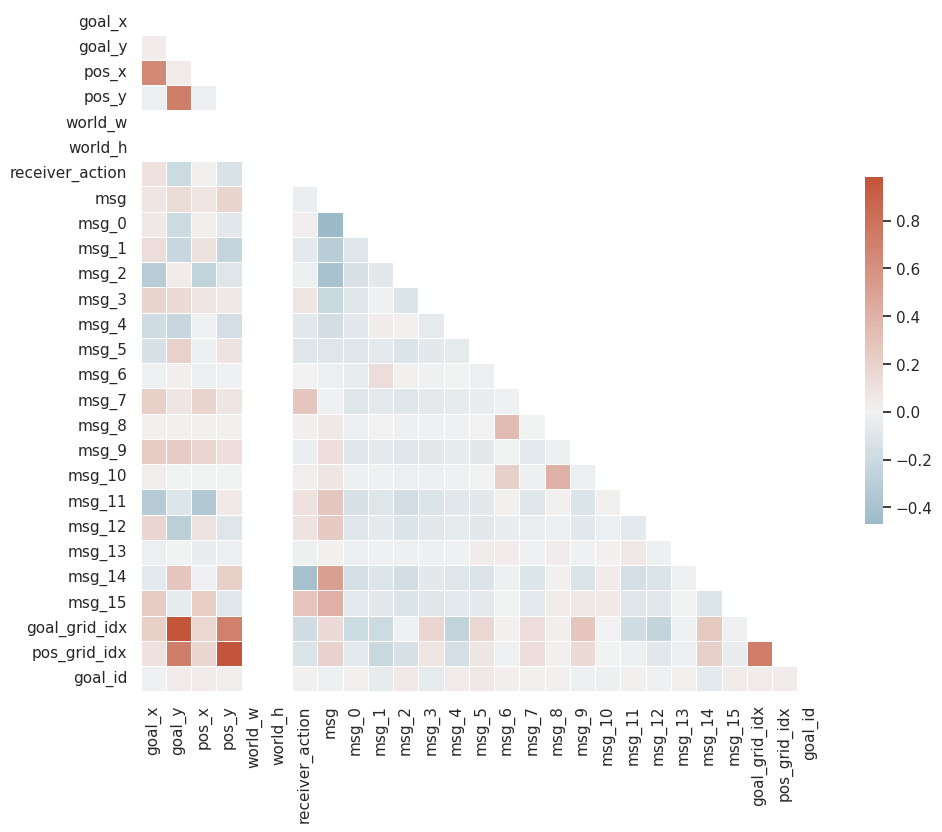

In [36]:
corr = df.corr()
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

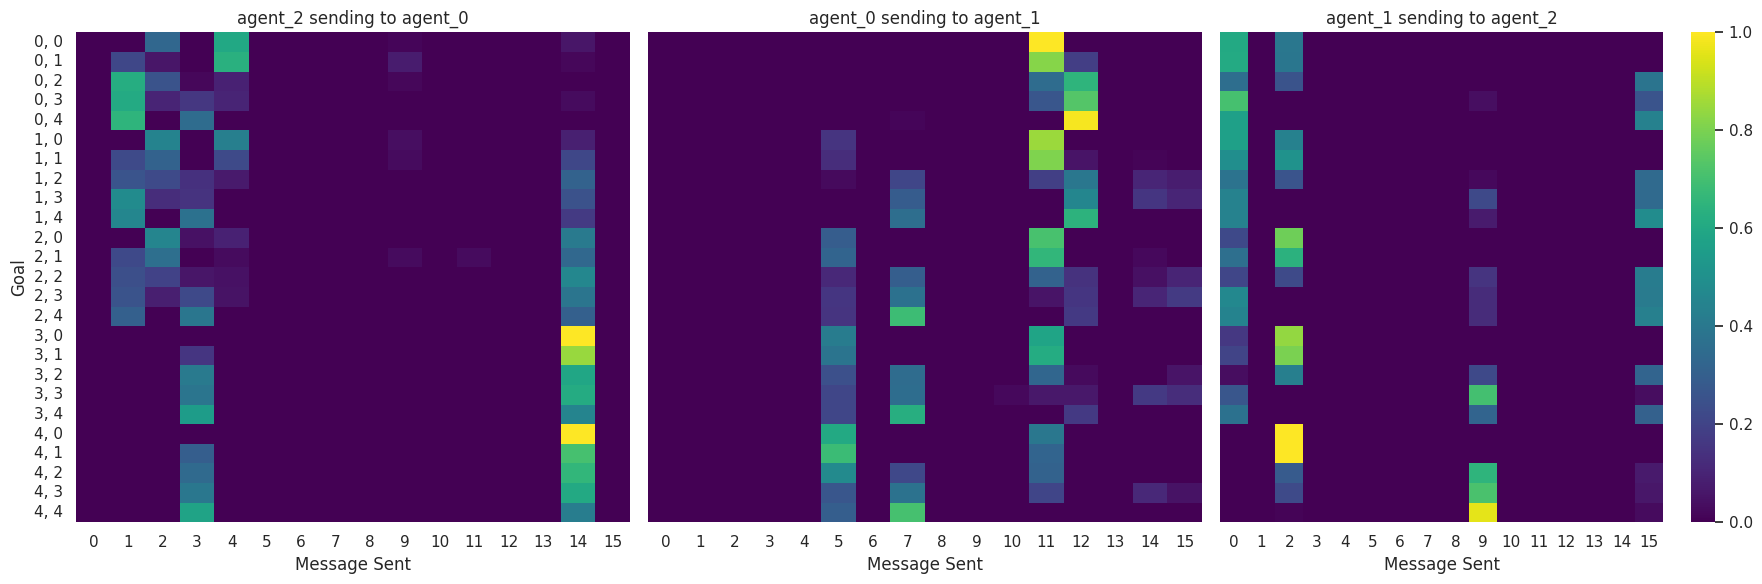

In [37]:
world_w, world_h = eval_config.env_config['world_shape']
agents = df['sender'].unique()
_, axs = plt.subplots(1, len(agents), figsize=(6 * len(agents), 6))
for i, agent in enumerate(agents):
    agent_df = df[df['sender'] == agent]
    recvs = agent_df['receiver'].unique()
    assert recvs.size == 1
    recv = recvs[0]
    agent_df = agent_df.groupby('goal_grid_idx')['msg'].value_counts(normalize=True).unstack()
    counts_df = agent_df.fillna(0)
    counts = np.zeros((world_w * world_h, n_msgs))
    for msg in counts_df.columns:
        for goal_idx in counts_df.index:
            counts[goal_idx, msg] = counts_df.loc[goal_idx, msg]
    sns.heatmap(counts, cmap='viridis', ax=axs[i], cbar=i == len(agents) - 1)
    if i > 0:
        axs[i].set_ylabel('')
        axs[i].set_yticks([])
    else:
        axs[i].set_ylabel('Goal')
        axs[i].set_yticklabels([
            f'{int(x)}, {int(y)}'
            for x in range(world_w)
            for y in range(world_h)
        ])
    axs[i].set_xlabel('Message Sent')
    axs[i].set_title(f'{agent} sending to {recv}')
plt.tight_layout()
plt.show()

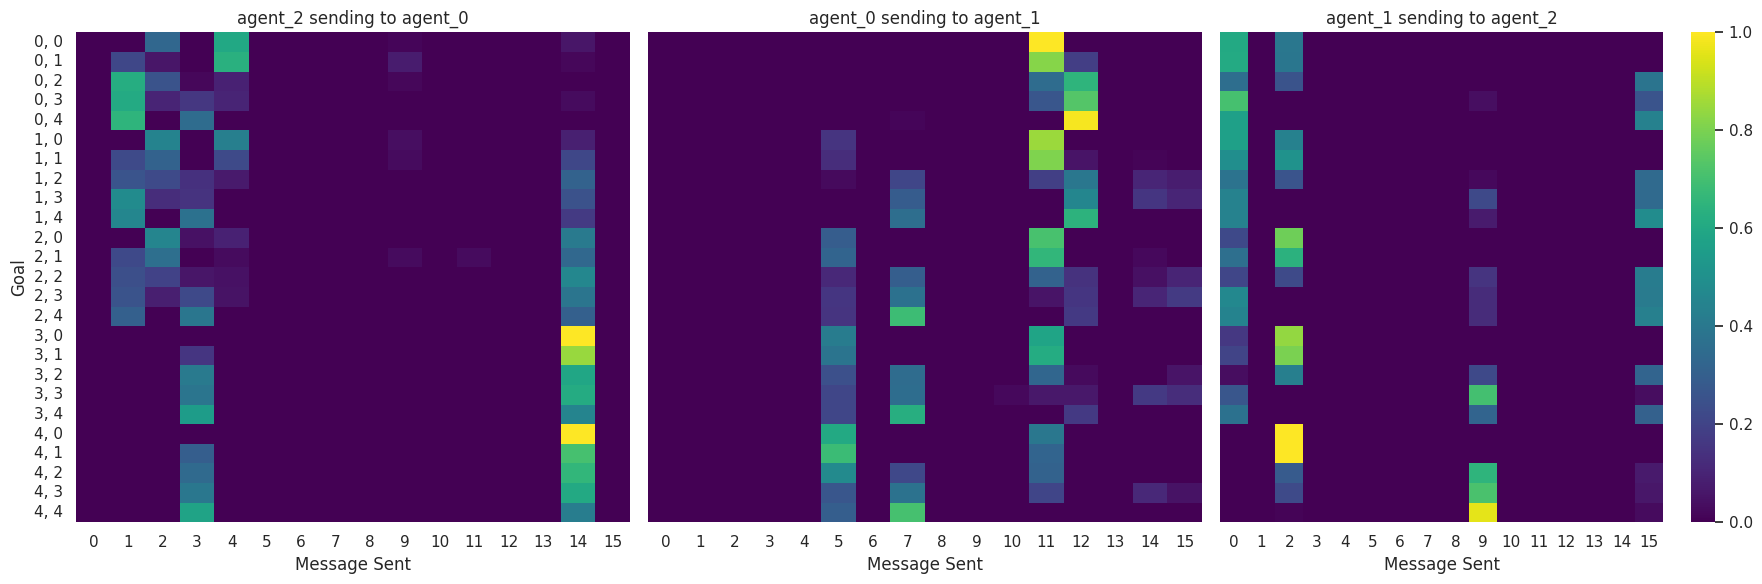

In [38]:
agents = df['sender'].unique()
_, axs = plt.subplots(1, len(agents), figsize=(6 * len(agents), 6))
for i, agent in enumerate(agents):
    agent_df = df[df['sender'] == agent]
    recvs = agent_df['receiver'].unique()
    assert recvs.size == 1
    recv = recvs[0]
    agent_df = agent_df.groupby('goal_grid_idx')['msg'].value_counts(normalize=True).unstack()
    counts_df = agent_df.fillna(0)
    counts = np.zeros((world_w * world_h, n_msgs))
    for msg in counts_df.columns:
        for goal_idx in counts_df.index:
            counts[goal_idx, msg] = counts_df.loc[goal_idx, msg]
    sns.heatmap(counts, cmap='viridis', ax=axs[i], cbar=i == len(agents) - 1)
    if i > 0:
        axs[i].set_ylabel('')
        axs[i].set_yticks([])
    else:
        axs[i].set_ylabel('Goal')
        axs[i].set_yticklabels([
            f'{int(x)}, {int(y)}'
            for x in range(world_w)
            for y in range(world_h)
        ])
    axs[i].set_xlabel('Message Sent')
    axs[i].set_title(f'{agent} sending to {recv}')
plt.tight_layout()
plt.show()

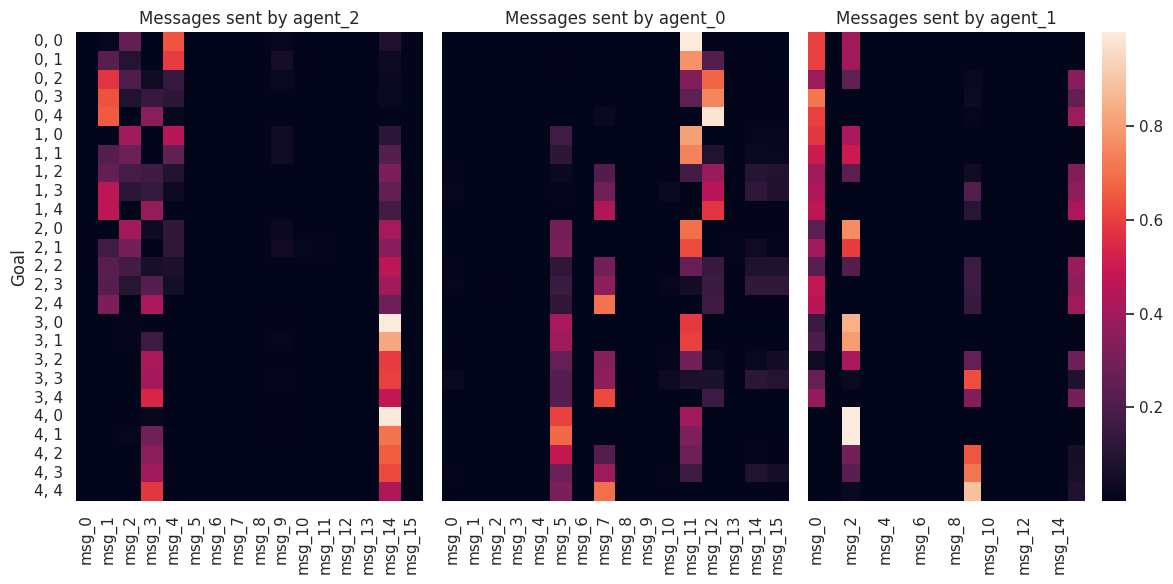

In [39]:
agents = df['sender'].unique()
_, axs = plt.subplots(1, len(agents), figsize=(4 * len(agents), 6))
msg_cols = [f'msg_{i}' for i in range(n_msgs)]
for i, agent in enumerate(agents):
    action_mean_msgs = df[df.sender == agent].groupby('goal_grid_idx')[msg_cols].mean()
    action_mean_msgs = action_mean_msgs.reset_index().set_index('goal_grid_idx')
    sns.heatmap(action_mean_msgs, ax=axs[i], cbar=i == len(agents) - 1)
    axs[i].set_title(f'Messages sent by {agent}')
    if i > 0:
        axs[i].set_ylabel('')
        axs[i].set_yticks([])
    else:
        axs[i].set_ylabel('Goal')
        axs[i].set_yticklabels([
            f'{int(x)}, {int(y)}'
            for x in range(world_w)
            for y in range(world_h)
        ])
plt.tight_layout()
plt.show()

In [49]:
import ray

ray.shutdown()

In [ ]:
agents = df['sender'].unique()
_, axs = plt.subplots(1, len(agents), figsize=(4 * len(agents), 6))
msg_cols = [f'msg_{i}' for i in range(n_msgs)]
for i, agent in enumerate(agents):
    action_mean_msgs = df[df.sender == agent].groupby('goal_grid_idx')[msg_cols].mean()
    action_mean_msgs = action_mean_msgs.reset_index().set_index('goal_grid_idx')
    sns.heatmap(action_mean_msgs, ax=axs[i], cbar=i == len(agents) - 1)
    axs[i].set_title(f'Messages sent by {agent}')
    if i > 0:
        axs[i].set_ylabel('')
        axs[i].set_yticks([])
    else:
        axs[i].set_ylabel('Goal')
        axs[i].set_yticklabels([
            f'{int(x)}, {int(y)}'
            for x in range(world_w)
            for y in range(world_h)
        ])
plt.tight_layout()
plt.show()

In [43]:
df.head()

,receiver,sender,goal_x,goal_y,pos_x,pos_y,world_w,world_h,receiver_action,msg,...,msg_9,msg_10,msg_11,msg_12,msg_13,msg_14,msg_15,goal_grid_idx,pos_grid_idx,goal_id
0,agent_0,agent_2,0,4,2,4,5,5,1,14,...,3.970919e-06,3.262032e-07,1.047835e-08,6.089158e-06,8.496772e-08,9.979903e-01,6.343535e-09,20,22,0
1,agent_1,agent_0,0,2,0,2,5,5,3,11,...,1.673886e-06,1.687236e-05,9.976909e-01,5.905794e-08,4.254010e-04,1.182646e-03,3.586146e-04,10,10,1
2,agent_2,agent_1,4,4,1,1,5,5,1,9,...,9.999708e-01,6.732524e-11,3.448662e-10,5.782564e-10,7.507350e-11,2.770565e-10,2.923401e-05,24,6,2
3,agent_0,agent_2,0,4,1,4,5,5,3,14,...,6.905973e-05,1.660644e-06,1.396546e-07,1.333429e-04,3.526454e-06,9.951546e-01,3.860085e-07,20,21,0
4,agent_1,agent_0,0,2,1,2,5,5,1,5,...,8.464187e-10,3.206404e-07,4.873031e-06,9.645123e-12,1.307496e-06,9.954303e-06,1.119987e-05,10,11,1


(raylet) [2023-11-05 13:06:05,268 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2060763136; capacity: 269490393088. Object creation will fail if spilling is required.


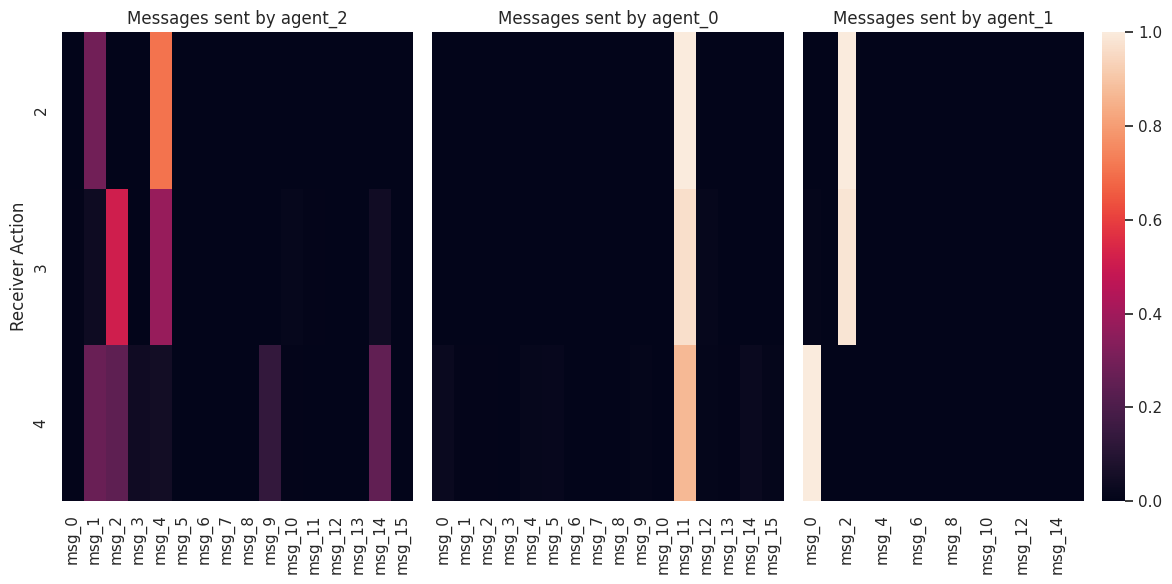

(raylet) [2023-11-05 13:07:15,353 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2060566528; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 13:07:25,366 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2060562432; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 13:07:35,378 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2060558336; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 13:07:45,392 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2060558336; capacity: 269490393088. Object creation will fail if spilli

In [48]:
agents = df['sender'].unique()
_, axs = plt.subplots(1, len(agents), figsize=(4 * len(agents), 6))
for i, agent in enumerate(agents):
    action_mean_msgs = df[(df.sender == agent) & (df.pos_x == 0) & (df.pos_y == 0)].groupby('receiver_action')[msg_cols].mean()
    action_mean_msgs = action_mean_msgs.reset_index().set_index('receiver_action')
    sns.heatmap(action_mean_msgs, ax=axs[i], cbar=i == len(agents) - 1, vmin=0, vmax=1)
    axs[i].set_title(f'Messages sent by {agent}')
    if i > 0:
        axs[i].set_ylabel('')
        axs[i].set_yticks([])
    else:
        axs[i].set_ylabel('Receiver Action')

plt.tight_layout()
plt.show()

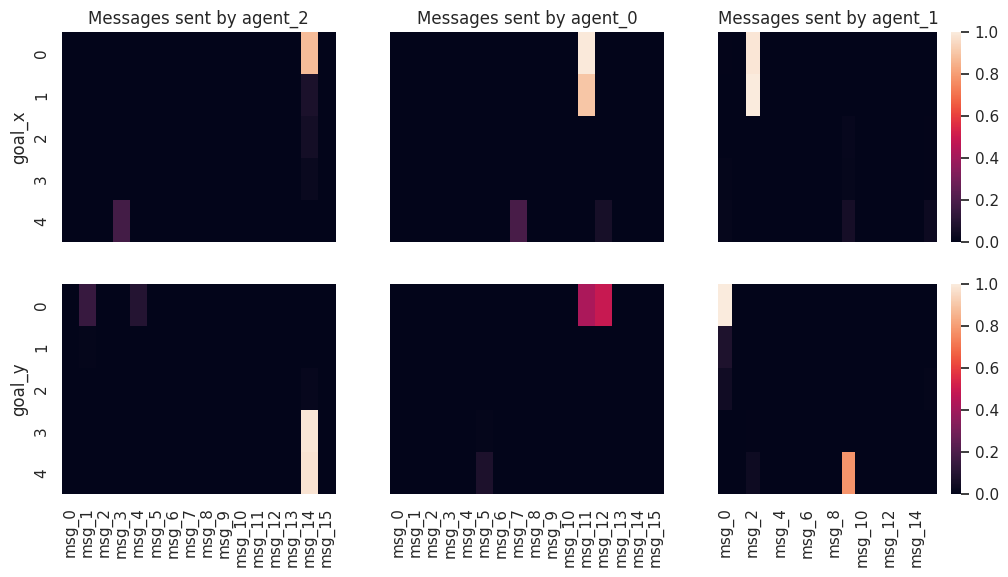

(raylet) [2023-11-05 13:03:35,089 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2061012992; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 13:03:45,102 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2061012992; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 13:03:55,113 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2060980224; capacity: 269490393088. Object creation will fail if spilling is required.
(raylet) [2023-11-05 13:04:05,123 E 1027 1046] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2023-11-05_12-52-51_906240_512 is over 95% full, available space: 2060967936; capacity: 269490393088. Object creation will fail if spilli

In [42]:
agents = df['sender'].unique()
_, axs_grid = plt.subplots(2, len(agents), figsize=(4 * len(agents), 6))
# msg_cols = [col for col in df.columns if col.startswith('msg')]
for i, agent in enumerate(agents):
    agent_df = df[df.sender == agent]
    
    goal_x_mean_msgs = agent_df.groupby('goal_x')[msg_cols].median()
    goal_x_mean_msgs = goal_x_mean_msgs.reset_index().set_index('goal_x')
    sns.heatmap(goal_x_mean_msgs, ax=axs_grid[0][i], cbar=i == len(agents) - 1, vmin=0, vmax=1)

    goal_y_mean_msgs = agent_df.groupby('goal_y')[msg_cols].median()
    goal_y_mean_msgs = goal_y_mean_msgs.reset_index().set_index('goal_y')
    sns.heatmap(goal_y_mean_msgs, ax=axs_grid[1][i], cbar=i == len(agents) - 1, vmin=0, vmax=1)

    axs_grid[0][i].set_title(f'Messages sent by {agent}')
    axs_grid[0][i].set_xticks([])
    if i > 0:
        axs_grid[0][i].set_ylabel('')
        axs_grid[0][i].set_yticks([])
        axs_grid[1][i].set_ylabel('')
        axs_grid[1][i].set_yticks([])

<AxesSubplot: >

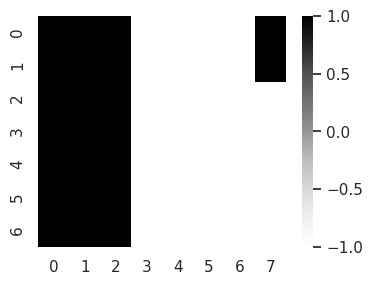

In [82]:
messages_01 = np.vstack([
    item['comms']['agent_0']['agent_1']
    for item in collect_comms_data_cb.data
    if item['episode_id'] == episodes[0]
])

plt.figure(figsize=(4, 3))
sns.heatmap(messages_01, vmin=-1, vmax=1, cmap='Greys')